<a href="https://colab.research.google.com/github/leomay282/notebooks_sprint5/blob/dev/17_1_1_THEORY_Normalization_and_Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing (NLP) with Python

Topics to be covered:

  1. Natural Language Toolkit
  2. Word Cloud
  3. Stemming
  4. Lemmatization
  5. Part-of-Speech (PoS) Tagging
  6. WordNet
  7. Integer_Encoding and One_Hot_Encoding
  8. Bag of Words
  9. TF-IDF (Term Frequency Inverse Document Frequency)

In [1]:
# Read the data
text = """NLP is a subfield of computer science and artificial intelligence concerned with interactions between computers and human (natural) languages. It is used to apply machine learning algorithms to text and speech.
For example, we can use NLP to create systems like speech recognition, document summarization, machine translation, spam detection, named entity recognition, question answering, autocomplete, predictive typing and so on.
Nowadays, most of us have smartphones that have speech recognition. These smartphones use NLP to understand what is said. Also, many people use laptops which operating system has a built-in speech recognition.
"""

# Print the text
print(text)

NLP is a subfield of computer science and artificial intelligence concerned with interactions between computers and human (natural) languages. It is used to apply machine learning algorithms to text and speech.
For example, we can use NLP to create systems like speech recognition, document summarization, machine translation, spam detection, named entity recognition, question answering, autocomplete, predictive typing and so on.
Nowadays, most of us have smartphones that have speech recognition. These smartphones use NLP to understand what is said. Also, many people use laptops which operating system has a built-in speech recognition.



## 1) Natural Language Toolkit

In [2]:
# Import required libraries
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
# Sentence tokenization
sentences = sent_tokenize(text)
print (len(sentences))
print(sentences)

6
['NLP is a subfield of computer science and artificial intelligence concerned with interactions between computers and human (natural) languages.', 'It is used to apply machine learning algorithms to text and speech.', 'For example, we can use NLP to create systems like speech recognition, document summarization, machine translation, spam detection, named entity recognition, question answering, autocomplete, predictive typing and so on.', 'Nowadays, most of us have smartphones that have speech recognition.', 'These smartphones use NLP to understand what is said.', 'Also, many people use laptops which operating system has a built-in speech recognition.']


In [4]:
# Word tokenization
words = word_tokenize(text)
print(len(words))
print(words)

110
['NLP', 'is', 'a', 'subfield', 'of', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', '.', 'It', 'is', 'used', 'to', 'apply', 'machine', 'learning', 'algorithms', 'to', 'text', 'and', 'speech', '.', 'For', 'example', ',', 'we', 'can', 'use', 'NLP', 'to', 'create', 'systems', 'like', 'speech', 'recognition', ',', 'document', 'summarization', ',', 'machine', 'translation', ',', 'spam', 'detection', ',', 'named', 'entity', 'recognition', ',', 'question', 'answering', ',', 'autocomplete', ',', 'predictive', 'typing', 'and', 'so', 'on', '.', 'Nowadays', ',', 'most', 'of', 'us', 'have', 'smartphones', 'that', 'have', 'speech', 'recognition', '.', 'These', 'smartphones', 'use', 'NLP', 'to', 'understand', 'what', 'is', 'said', '.', 'Also', ',', 'many', 'people', 'use', 'laptops', 'which', 'operating', 'system', 'has', 'a', 'built-in', 'speech', 'recognition', '.']


In [5]:
# Frequency Distribution
# The FreqDist class is used to encode “frequency distributions”
# FreqDist count the number of times that each outcome of an experiment occurs

from nltk.probability import FreqDist
fdist = FreqDist(words)
fdist.most_common(5)                  # Print 5 most common words

[(',', 10), ('.', 6), ('and', 4), ('to', 4), ('speech', 4)]

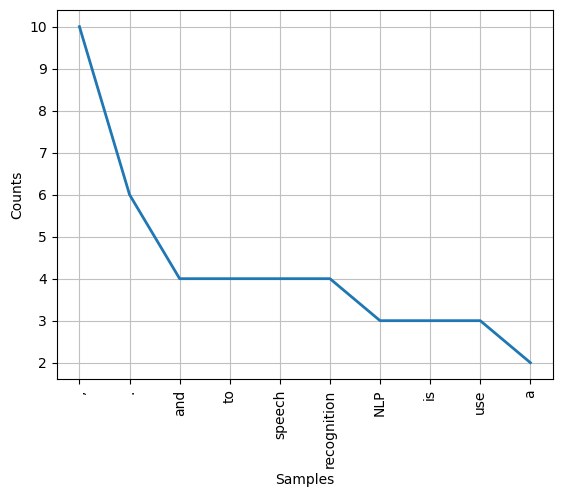

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)                         # Plot the graph for fdist

In [6]:
# Removing punctuation marks
words_no_punc = []
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower()) # Append words with alphabet only. also changing the case to lower
print (len(words_no_punc))              # Length
print (words_no_punc)                   # Print the words without punctution marks

91
['nlp', 'is', 'a', 'subfield', 'of', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'interactions', 'between', 'computers', 'and', 'human', 'natural', 'languages', 'it', 'is', 'used', 'to', 'apply', 'machine', 'learning', 'algorithms', 'to', 'text', 'and', 'speech', 'for', 'example', 'we', 'can', 'use', 'nlp', 'to', 'create', 'systems', 'like', 'speech', 'recognition', 'document', 'summarization', 'machine', 'translation', 'spam', 'detection', 'named', 'entity', 'recognition', 'question', 'answering', 'autocomplete', 'predictive', 'typing', 'and', 'so', 'on', 'nowadays', 'most', 'of', 'us', 'have', 'smartphones', 'that', 'have', 'speech', 'recognition', 'these', 'smartphones', 'use', 'nlp', 'to', 'understand', 'what', 'is', 'said', 'also', 'many', 'people', 'use', 'laptops', 'which', 'operating', 'system', 'has', 'a', 'speech', 'recognition']


In [7]:
fdist = FreqDist(words_no_punc)
fdist.most_common(5)                     # Print 5 most common words

[('and', 4), ('to', 4), ('speech', 4), ('recognition', 4), ('nlp', 3)]

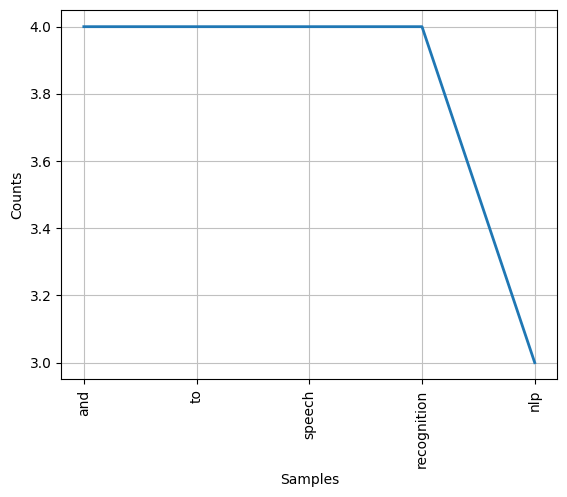

<Axes: xlabel='Samples', ylabel='Counts'>

In [8]:
fdist.plot(5)                            # Plot the most common words on grpah

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Remove stopwords
clean_words = []
for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)
print(len(clean_words))
print(clean_words)

60
['nlp', 'subfield', 'computer', 'science', 'artificial', 'intelligence', 'concerned', 'interactions', 'computers', 'human', 'natural', 'languages', 'used', 'apply', 'machine', 'learning', 'algorithms', 'text', 'speech', 'example', 'use', 'nlp', 'create', 'systems', 'like', 'speech', 'recognition', 'document', 'summarization', 'machine', 'translation', 'spam', 'detection', 'named', 'entity', 'recognition', 'question', 'answering', 'autocomplete', 'predictive', 'typing', 'nowadays', 'us', 'smartphones', 'speech', 'recognition', 'smartphones', 'use', 'nlp', 'understand', 'said', 'also', 'many', 'people', 'use', 'laptops', 'operating', 'system', 'speech', 'recognition']


In [11]:
# Frequency distribution
fdist = FreqDist(clean_words)
fdist.most_common(5)                      # Print 5 most common words

[('speech', 4), ('recognition', 4), ('nlp', 3), ('use', 3), ('machine', 2)]

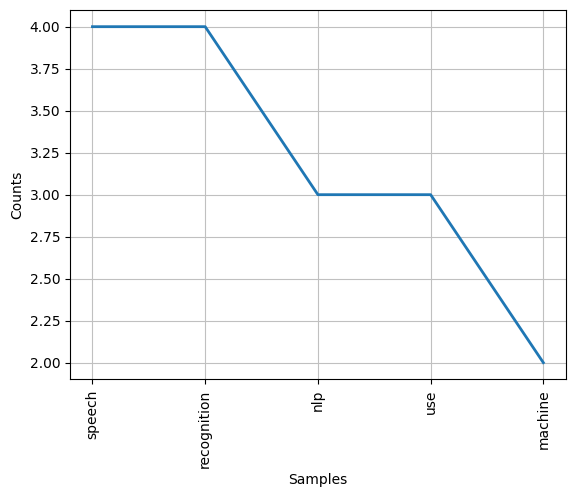

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(5)                             # Plot the most common words on grpah

## 2) Word Cloud

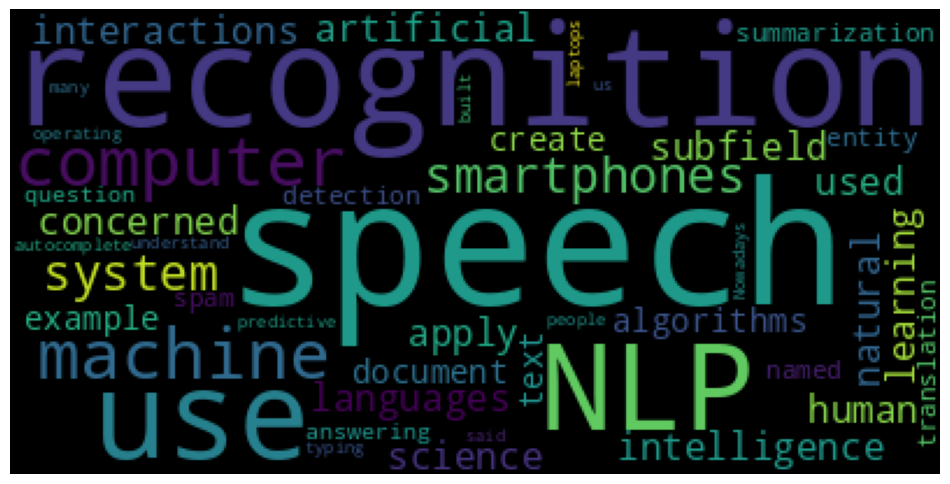

In [12]:
# Library to form wordcloud
# !pip install wordcloud
from wordcloud import WordCloud

# Library to plot the wordcloud
import matplotlib.pyplot as plt

# Generating the wordcloud
wordcloud = WordCloud().generate(text)

# Plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# To remove the axis value
plt.axis("off")
plt.show()

## 3) Stemming

In [15]:
# Import stemming library
from nltk.stem import PorterStemmer
porter = PorterStemmer()

# Word-list for stemming
word_list = ["carry","carrying","carried"]
for w in word_list:
    print(porter.stem(w))

carri
carri
carri


In [16]:
# Import stemming library
from nltk.stem import PorterStemmer
porter = PorterStemmer()

# Word-list for stemming
word_list = ["carry","eating","decreases","reading"]
for w in word_list:
    print(porter.stem(w))

carri
eat
decreas
read


In [17]:
# Import stemming library
from nltk.stem import SnowballStemmer

# Print languages supported
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [18]:
# Import stemming library
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer("english")

# Word-list for stemming
word_list = ["carry","carrying","carried"]

for w in word_list:
    print(snowball.stem(w))

carri
carri
carri


## 4) Lemmatization

In [19]:
from nltk import WordNetLemmatizer

lemma = WordNetLemmatizer()
word_list = ["carry","carrying","carried"]

for w in word_list:
    print(lemma.lemmatize(w, pos="v"))

carry
carry
carry


In [20]:
for w in word_list:
    print(lemma.lemmatize(w))

carry
carrying
carried


In [21]:
from nltk.stem import WordNetLemmatizer

# POS: Part of speeach
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('reading', pos="v")) # Verb
print(lemmatizer.lemmatize('reading', pos="n")) # Noun
print(lemmatizer.lemmatize('reading', pos="a")) # Adjective
print(lemmatizer.lemmatize('reading', pos="r")) # Adverb

read
reading
reading
reading


## 5) Part-of-Speech (PoS) Tagging

In [22]:
print(nltk.pos_tag.__doc__)


    Use NLTK's currently recommended part of speech tagger to
    tag the given list of tokens.

        >>> from nltk.tag import pos_tag
        >>> from nltk.tokenize import word_tokenize
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad.")) # doctest: +NORMALIZE_WHITESPACE
        [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'),
        ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad."), tagset='universal') # doctest: +NORMALIZE_WHITESPACE
        [('John', 'NOUN'), ("'s", 'PRT'), ('big', 'ADJ'), ('idea', 'NOUN'), ('is', 'VERB'),
        ("n't", 'ADV'), ('all', 'DET'), ('that', 'DET'), ('bad', 'ADJ'), ('.', '.')]

    NB. Use `pos_tag_sents()` for efficient tagging of more than one sentence.

    :param tokens: Sequence of tokens to be tagged
    :type tokens: list(str)
    :param tagset: the tagset to be used, e.g. universal, wsj, brown


In [23]:
# nltk.download('averaged_perceptron_tagger')
sentence = "Almost every sentence contains at least one noun phrase"

# Tokenizing words
tokenized_words = word_tokenize(sentence)

tagged_words = nltk.pos_tag(tokenized_words)
tagged_words

[('Almost', 'RB'),
 ('every', 'DT'),
 ('sentence', 'NN'),
 ('contains', 'VBZ'),
 ('at', 'IN'),
 ('least', 'JJS'),
 ('one', 'CD'),
 ('noun', 'JJ'),
 ('phrase', 'NN')]

## 6) WordNet

In [24]:
# Import wordnet
# nltk.download('wordnet')
from nltk.corpus import wordnet

for words in wordnet.synsets("Sun"):
    print(words.definition())

the star that is the source of light and heat for the planets in the solar system
the rays of the sun
a person considered as a source of warmth or energy or glory etc
any star around which a planetary system revolves
first day of the week; observed as a day of rest and worship by most Christians
expose one's body to the sun
expose to the rays of the sun or affect by exposure to the sun


In [25]:
# Word meaning with definitions

# LEMMA - a heading indicating the subject or argument of a literary composition or annotation

for words in wordnet.synsets("Fun"):
    print(words.name())
    print(words.definition())
    print(words.examples())
    for lemma in words.lemmas(): # Corresponding synonyms
        print(lemma)
    print("-------------")

fun.n.01
activities that are enjoyable or amusing
['I do it for the fun of it', 'he is fun to have around']
Lemma('fun.n.01.fun')
Lemma('fun.n.01.merriment')
Lemma('fun.n.01.playfulness')
-------------
fun.n.02
verbal wit or mockery (often at another's expense but not to be taken seriously)
['he became a figure of fun', 'he said it in sport']
Lemma('fun.n.02.fun')
Lemma('fun.n.02.play')
Lemma('fun.n.02.sport')
-------------
fun.n.03
violent and excited activity
['she asked for money and then the fun began', 'they began to fight like fun']
Lemma('fun.n.03.fun')
-------------
playfulness.n.02
a disposition to find (or make) causes for amusement
['her playfulness surprised me', 'he was fun to be with']
Lemma('playfulness.n.02.playfulness')
Lemma('playfulness.n.02.fun')
-------------


In [26]:
# Finding synonyms

# Empty list to store synonyms
synonyms = []

for words in wordnet.synsets('Fun'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())

set(synonyms)

{'fun', 'merriment', 'play', 'playfulness', 'sport'}

In [27]:
word_list = ["carry","carrying","carried"]
wordnet_word = []

for word in word_list:
  w = wordnet.synsets(word)[0]
  wordnet_word.append(w)


In [28]:
wordnet_word[0].lemmas()[0].name()

'carry'

In [29]:
wordnet_word[1].lemmas()[0].name()

'transport'

In [33]:
# Finding antonyms

# Empty list to store antonyms
antonyms = []

for words in wordnet.synsets('Up'):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

# Print antonyms
set(antonyms)

{'down', 'downward', 'downwardly', 'downwards'}

In [34]:
# Similarity in words
word1 = wordnet.synsets("car","n")[0]
word2 = wordnet.synsets("vehicle","n")[0]

# Check similarity
print(word1.lemmas()[0].name())
print(word2.lemmas()[0].name())
print(word1.wup_similarity(word2))

car
vehicle
0.8


In [35]:
# Similarity in words
word1 = wordnet.synsets("ship","n")[0]
word2 = wordnet.synsets("bat","n")[0]

# Check similarity
print(word1.wup_similarity(word2))

0.34782608695652173


## 7) Integer_Encoding and One_Hot_Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot']
print(data)

# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

# Binary encode
onehot_encoder = OneHotEncoder(sparse=False) # No hashing
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1) # Make it column matrix 6x1
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

['cold', 'cold', 'warm', 'cold', 'hot', 'hot']
[0 0 2 0 1 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 8) Bag of Words

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ['Shyam is a bad boy','Ram is a good boy']
cv = CountVectorizer()                              # Create an object
B_O_W = cv.fit_transform(sentences).toarray()       # Generating output for Bag of Words
print(cv.vocabulary_)
print(cv.get_feature_names_out())
print('Bag of Words')
print(B_O_W)

{'shyam': 5, 'is': 3, 'bad': 0, 'boy': 1, 'ram': 4, 'good': 2}
['bad' 'boy' 'good' 'is' 'ram' 'shyam']
Bag of Words
[[1 1 0 1 0 1]
 [0 1 1 1 1 0]]


In [ ]:
sentences = ['Shyam is a good boy','Ram is not a good boy']
cv = CountVectorizer(ngram_range=(1, 2))             # Create an object
B_O_W = cv.fit_transform(sentences).toarray()       # Generating output for Bag of Words
print(cv.vocabulary_)
print(cv.get_feature_names_out())
print('Bag of Words')
print(B_O_W)

{'shyam': 10, 'is': 3, 'good': 1, 'boy': 0, 'shyam is': 11, 'is good': 4, 'good boy': 2, 'ram': 8, 'not': 6, 'ram is': 9, 'is not': 5, 'not good': 7}
['boy' 'good' 'good boy' 'is' 'is good' 'is not' 'not' 'not good' 'ram'
 'ram is' 'shyam' 'shyam is']
Bag of Words
[[1 1 1 1 1 0 0 0 0 0 1 1]
 [1 1 1 1 0 1 1 1 1 1 0 0]]


## 9) TF-IDF (Term Frequency Inverse Document Frequency)

In [39]:
# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Sentences for analysis
sentences = ['It is a good book', 'It is not a good book', 'It is a very good book', 'It is very very good book']

# Create an object
vectorizer = TfidfVectorizer(norm=None)

# Generating output for TF_IDF
X = vectorizer.fit_transform(sentences).toarray()

# Total words with their index in model
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names_out())

# Show the output
print(X)

{'it': 3, 'is': 2, 'good': 1, 'book': 0, 'not': 4, 'very': 5}
['book' 'good' 'is' 'it' 'not' 'very']
[[1.         1.         1.         1.         0.         0.        ]
 [1.         1.         1.         1.         1.91629073 0.        ]
 [1.         1.         1.         1.         0.         1.51082562]
 [1.         1.         1.         1.         0.         3.02165125]]


In [40]:
import pandas as pd
pd.DataFrame(data=X, columns=vectorizer.get_feature_names_out())

,book,good,is,it,not,very
0,1.0,1.0,1.0,1.0,0.000000,0.000000
1,1.0,1.0,1.0,1.0,1.916291,0.000000
2,1.0,1.0,1.0,1.0,0.000000,1.510826
3,1.0,1.0,1.0,1.0,0.000000,3.021651


In [41]:
aaa

NameError: name 'aaa' is not defined